In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import KNNImputer




In [4]:
df = pd.read_csv("../../data/welddb.csv")

In [5]:
df.head()

,weld_id,c_c,si_c,mn_c,su_c,ph_c,ni_c,ch_c,mol_c,va_c,...,reduc_area,charpy_temp,charpy_imp_tough,hardness,fatt,prim_ferr,ferr_sec,acic_ferr,martensite,ferr_carb
0,Evans-Ni/CMn-1990/1991-0Aaw,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,...,80.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Evans-Ni/CMn-1990/1991-0Aawch,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,...,NaN,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Evans-Ni/CMn-1990/1991-0Aht,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,...,80.6,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Evans-Ni/CMn-1990/1991-0Baw,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,...,80.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Evans-Ni/CMn-1990/1991-0Bawch,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,...,NaN,-48.0,100.0,NaN,NaN,32.0,28.0,40.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weld_id           1652 non-null   object 
 1   c_c               1652 non-null   float64
 2   si_c              1652 non-null   float64
 3   mn_c              1652 non-null   float64
 4   su_c              1648 non-null   float64
 5   ph_c              1642 non-null   float64
 6   ni_c              697 non-null    float64
 7   ch_c              784 non-null    float64
 8   mol_c             793 non-null    float64
 9   va_c              928 non-null    float64
 10  cop_c             578 non-null    float64
 11  cob_c             129 non-null    float64
 12  tu_c              75 non-null     float64
 13  o_c               1256 non-null   float64
 14  ti_c              935 non-null    float64
 15  nit_c             1242 non-null   float64
 16  al_c              905 non-null    float64


<Axes: >

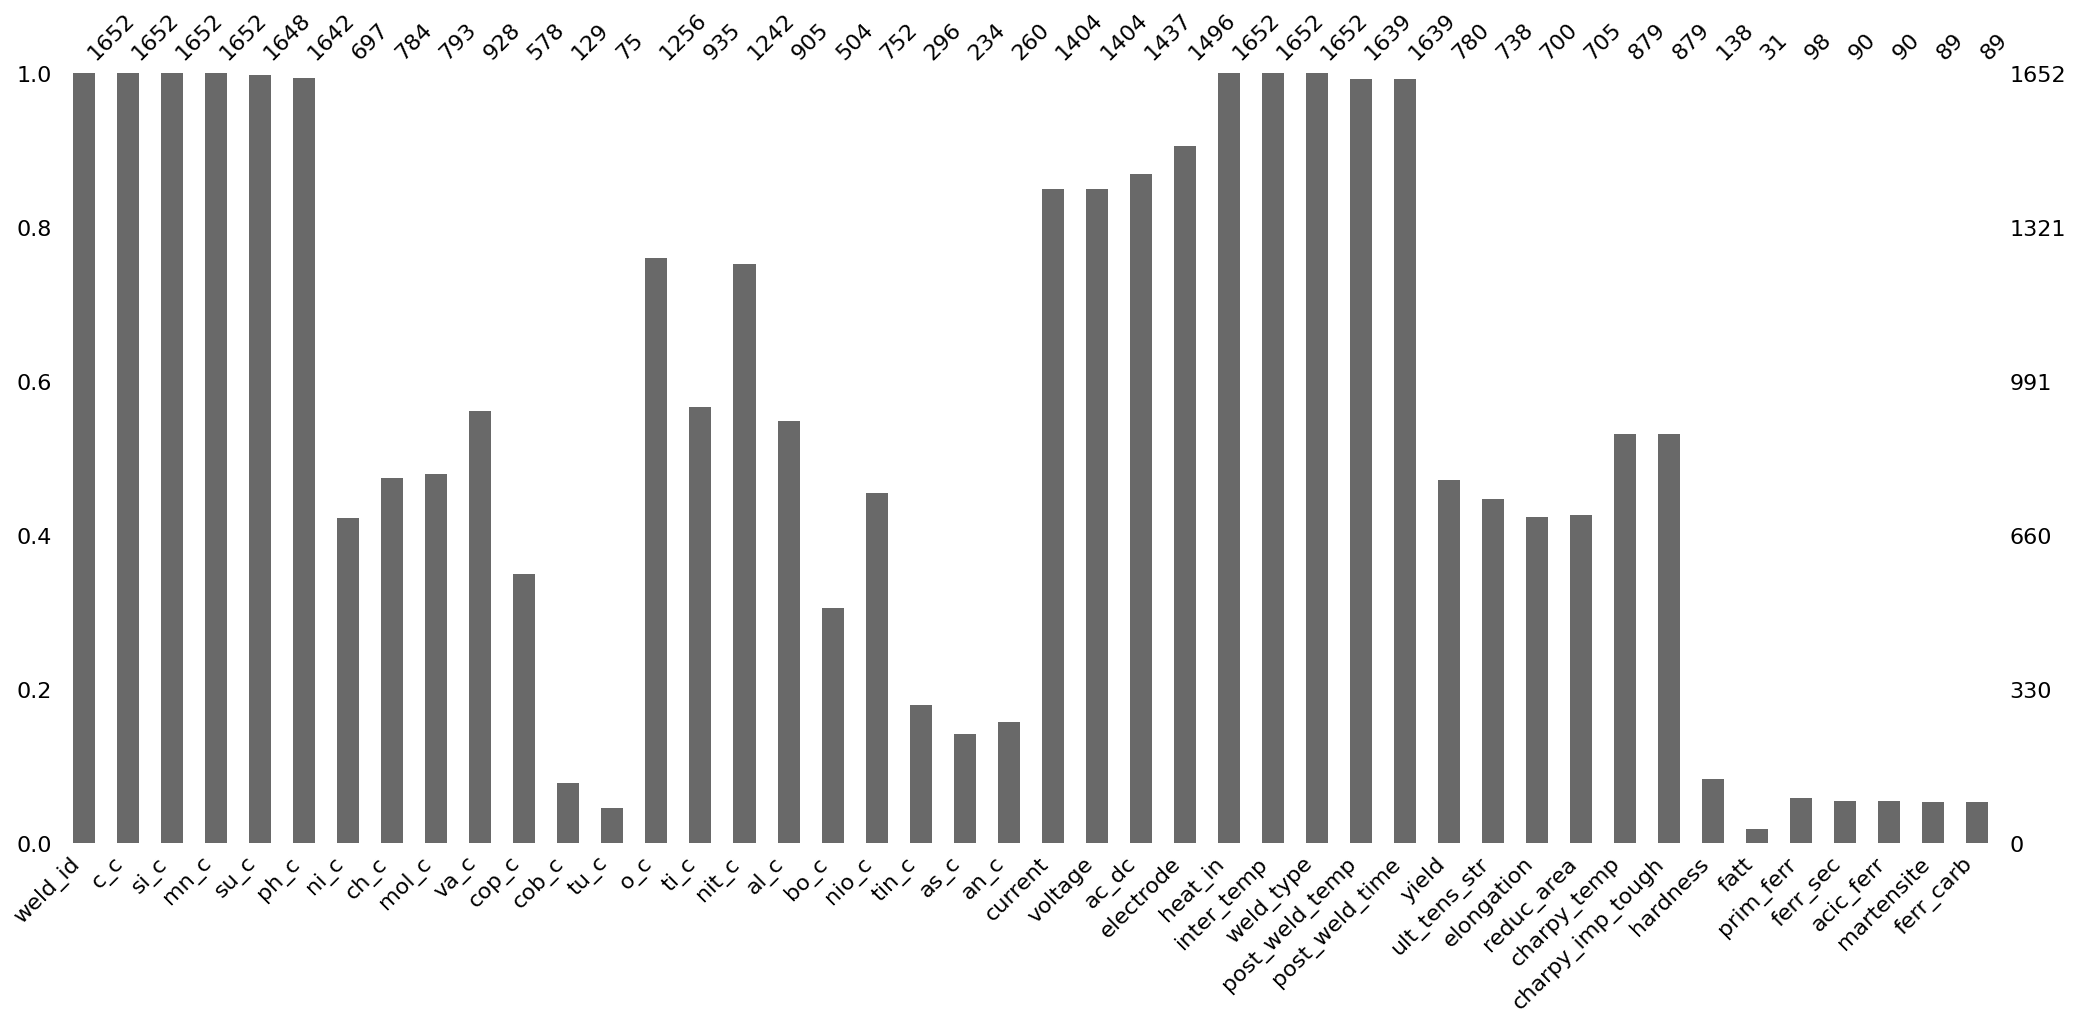

In [8]:
msno.bar(df)

In [14]:
cols_to_drop = ["fatt", "prim_ferr", "ferr_sec", "acic_ferr", "martensite", "ferr_carb"]
y_vars = ["yield", "ult_tens_str", "elongation", "reduc_area", "hardness"]

In [15]:
df.drop(columns=cols_to_drop, inplace=True)

In [12]:
def value_distribution(col_title, col):
    missing_pct = col.isnull().mean() * 100
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    if pd.api.types.is_numeric_dtype(col):
        sns.histplot(col.dropna(), kde=True)
    else: # the variable is categorical
        sns.countplot(y=col, order=col.value_counts().index)
    
    plt.title(f"{col_title}: {missing_pct:.2f}% missing")
    plt.xlabel(col_title)
    
    plt.show()

In [22]:
cat_vars = ["weld_type", "electrode", "ac_dc"]
num_vars = [col for col in df.columns if col not in cat_vars+["weld_id"]]
df_cat_encoded = pd.get_dummies(df[cat_vars])
df_pre_scaling = pd.concat([df[num_vars], df_cat_encoded], axis = 1)
df_pre_scaling

,c_c,si_c,mn_c,su_c,ph_c,ni_c,ch_c,mol_c,va_c,cop_c,...,weld_type_NGSAW,weld_type_SA,weld_type_SAA,weld_type_ShMA,weld_type_TSA,electrode_+,electrode_-,electrode_0.0,ac_dc_AC,ac_dc_DC
0,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,True
1,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,True
2,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,True
3,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,True
4,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,NaN,...,False,True,False,False,False,True,False,False,False,False
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,NaN,...,False,True,False,False,False,True,False,False,False,False
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,NaN,...,False,True,False,False,False,True,False,False,False,False
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,NaN,...,False,True,False,False,False,True,False,False,False,False


In [32]:
encoder = OrdinalEncoder()
df_cat_encoded = pd.DataFrame(encoder.fit_transform(df[cat_vars]), columns=cat_vars)
df_cat_encoded

,weld_type,electrode,ac_dc
0,3.0,0.0,1.0
1,3.0,0.0,1.0
2,3.0,0.0,1.0
3,3.0,0.0,1.0
4,3.0,0.0,1.0
...,...,...,...
1647,6.0,0.0,NaN
1648,6.0,0.0,NaN
1649,6.0,0.0,NaN
1650,6.0,0.0,NaN


Scaling data before kNN

In [26]:
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_pre_scaling[num_vars]), columns=num_vars)
df_num_scaled

,c_c,si_c,mn_c,su_c,ph_c,ni_c,ch_c,mol_c,va_c,cop_c,...,inter_temp,post_weld_temp,post_weld_time,yield,ult_tens_str,elongation,reduc_area,charpy_temp,charpy_imp_tough,hardness
0,-1.612394,-0.254200,-1.447095,-0.136250,-0.048545,-0.527774,NaN,NaN,NaN,NaN,...,-0.107148,-0.191563,1.468673,-1.255924,-1.449445,1.149576,0.986539,NaN,NaN,NaN
1,-1.612394,-0.254200,-1.447095,-0.136250,-0.048545,-0.527774,NaN,NaN,NaN,NaN,...,-0.107148,-1.067493,-0.828603,NaN,NaN,NaN,NaN,0.190282,0.245778,NaN
2,-1.612394,-0.254200,-1.447095,-0.136250,-0.048545,-0.527774,NaN,NaN,NaN,NaN,...,-0.107148,0.964665,-0.500421,-1.492978,-1.562343,1.824079,0.986539,-0.097746,0.245778,NaN
3,-1.612394,-0.165249,-0.452386,-0.225353,0.053387,-0.527774,NaN,NaN,NaN,NaN,...,-0.107148,-0.191563,1.468673,-1.029646,-1.088174,1.006499,0.986539,NaN,NaN,NaN
4,-1.612394,-0.165249,-0.452386,-0.225353,0.053387,-0.527774,NaN,NaN,NaN,NaN,...,-0.107148,-1.067493,-0.828603,NaN,NaN,NaN,NaN,-0.385774,0.245778,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1.024597,0.190556,-0.792681,-0.136250,0.155320,0.235210,2.148612,1.049729,0.167717,NaN,...,-0.107148,1.595334,-0.500421,3.506704,NaN,NaN,NaN,NaN,NaN,NaN
1648,0.522313,0.279507,-0.845034,-0.136250,0.206286,0.197060,2.082487,0.965890,0.188016,NaN,...,-0.107148,1.595334,-0.500421,3.377402,NaN,NaN,NaN,NaN,NaN,NaN
1649,0.606027,0.101605,-0.818857,-0.136250,0.155320,-0.311596,2.016363,0.965890,-0.157075,NaN,...,-0.107148,1.595334,-0.500421,1.631823,NaN,NaN,NaN,NaN,NaN,NaN
1650,0.689741,0.190556,-0.792681,-0.136250,0.155320,0.158911,2.082487,1.028769,0.147417,NaN,...,-0.107148,1.595334,-0.500421,3.485154,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_combined = pd.concat([df_num_scaled, df_cat_encoded], axis=1)

In [35]:
imputer = KNNImputer(n_neighbors=5)
df_num_imputed = pd.DataFrame(imputer.fit_transform(df_combined), columns=num_vars+cat_vars) # would it be better to impute numerical then cat separately ?




In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weld_id           1652 non-null   object 
 1   c_c               1652 non-null   float64
 2   si_c              1652 non-null   float64
 3   mn_c              1652 non-null   float64
 4   su_c              1648 non-null   float64
 5   ph_c              1642 non-null   float64
 6   ni_c              697 non-null    float64
 7   ch_c              784 non-null    float64
 8   mol_c             793 non-null    float64
 9   va_c              928 non-null    float64
 10  cop_c             578 non-null    float64
 11  cob_c             129 non-null    float64
 12  tu_c              75 non-null     float64
 13  o_c               1256 non-null   float64
 14  ti_c              935 non-null    float64
 15  nit_c             1242 non-null   float64
 16  al_c              905 non-null    float64
